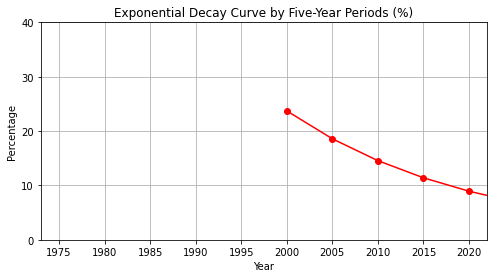

[23.71545983788116, 18.581683332811725, 14.559235108288828, 11.407541671110542, 8.938107394394438, 7.003241022213261, 5.487222590989407, 4.299382481277055, 3.3686786737366616, 2.6394478872969387]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters
debt = 100
years = 50  # Changed from 50 to 45 to match the years from 1975 to 2020
interval = 5
decay_rate = 0.05  # Increased decay rate

# Calculate the total sum of the decay series
total_sum = sum(1 / (1 + decay_rate) ** (t * interval) for t in range(int(years / interval)))

# Generate emissions
emissions = []
years_list = []
start_year = 2000  # Start year
for t in range(int(years / interval)):
    emission = debt / total_sum * (1 / (1 + decay_rate) ** (t * interval))  # Calculate scaled emissions
    emissions.append(emission)
    years_list.append(start_year + t * interval)  # Start years from 1975 and end at 2020

# Scale emissions so that year 0 is about 40, while keeping the total sum equal to debt
scaling_factor = 40 / emissions[0]
scaled_emissions = [emission * scaling_factor for emission in emissions]
total_scaled_emissions = sum(scaled_emissions)

# Adjust the scaled emissions to ensure the total sum equals debt
adjusted_scaled_emissions = [emission * debt / total_scaled_emissions for emission in scaled_emissions]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(years_list, adjusted_scaled_emissions, color='red', marker='o')
plt.xticks(range(1975, 2025, 5))  # Show x-axis ticks every 5 years
plt.yticks(range(0, 50, 10))
plt.xlim(left=1973, right=2022) # Set x-axis limits to start from 1975 and end at 2020
plt.ylim(bottom=0) # Set y-axis to start from the bottom
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Exponential Decay Curve by Five-Year Periods (%)')
plt.grid(True)

plt.show()

# Verify that the total emissions equal the debt
total_emissions = sum(adjusted_scaled_emissions)
print(adjusted_scaled_emissions)

In [1]:
import numpy as np
import xarray
import pandas as pd

In [5]:
GFRAC = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GFRAC_NEW.nc", engine="netcdf4")
GAREA = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis1_slidingwindows/GAREA.NC", engine="netcdf4")
GLCT = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GLCT_trans.nc", engine="netcdf4")

In [28]:
GLCT_1st = xarray.open_dataset('D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GLCT_trans1st.nc', engine="netcdf4")

In [17]:
emission_CO2_netcdf_AM23 = xarray.open_dataset("D:/kerja/asisten riset/code v/review/emission_CO2_AM23.nc", engine="netcdf4")

In [23]:
luc_agri_emissions_per_crops_AM3_v4 = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/luc_agri_emissions_per_crops_AM3_v4.NC", engine="netcdf4")

In [24]:
garea_2020 = GAREA.isel(time=slice(0, 11))
garea_ha = np.nan_to_num(np.multiply(garea_2020['GAREA'].to_numpy(), 100))

In [25]:
gfrac_area = np.zeros((11, 17, 2160, 4320), dtype="float32")

In [26]:
for n in range(11):
    for i in range(17):
        gfrac_area[n][i] = np.nan_to_num(np.multiply(GFRAC['GFRAC_new'].isel(time=n, NGFBFC=i), garea_ha[n]))

In [27]:
gfrac_ngfbfc = [element.strip() for element in GFRAC.coords['NGFBFC'].data.astype('str').tolist()]

gfrac_area_netcdf = xarray.Dataset({
    "GFRAC_area":(["time", "NGFBFC", "latitude", "longitude"], gfrac_area)
},coords={
        "time": pd.date_range(start='1970-01-01', end='2020-01-01', freq='5YS'),
        "NGFBFC": gfrac_ngfbfc,
        "latitude": GFRAC.coords["latitude"].to_numpy(),
        "longitude": GFRAC.coords["longitude"].to_numpy()
})
gfrac_area_netcdf

<xarray.Dataset>
Dimensions:     (time: 11, NGFBFC: 17, latitude: 2160, longitude: 4320)
Coordinates:
  * time        (time) datetime64[ns] 1970-01-01 1975-01-01 ... 2020-01-01
  * NGFBFC      (NGFBFC) <U32 'grass' 'Wheat' ... 'Plant based fibres'
  * latitude    (latitude) float64 89.96 89.88 89.79 ... -89.79 -89.87 -89.96
  * longitude   (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    GFRAC_area  (time, NGFBFC, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0

## validasi

In [48]:
x = [-51.706, -55.974643, 101.457, 109.38, -96.6289, 48.966]
y = [-22.698, -21.208333, 31.4420, -7.11, 18.549639, -18.07]
n = 2

emission_CO2_netcdf_AM23['LUC Crops Emission'].sel(latitude=y[n], longitude=x[n], method='nearest').to_pandas()

time
2020-01-01    0.002287
dtype: float32

In [27]:
GFRAC['GFRAC_new'].isel(time=slice(0, 11)).sel(latitude=y[n], longitude=x[n], method='nearest').to_pandas()

NGFBFC,b'grass ',b'Wheat ',b'Rice ',b'Maize ',b'Tropical cereals ',b'Other temperate cereals ',b'Pulses ',b'Soybeans ',b'Temperate oil crops ',b'Tropical oil crops ',b'Temperate roots & tubers ',b'Tropical roots & tubers ',b'Sugar crops ',b'Oil & palm fruit ',b'Vegetables & fruits ',b'Other non-food & luxury & spices ',b'Plant based fibres '
time,,,,,,,,,,,,,,,,,
1970-01-01,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1975-01-01,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1980-01-01,0.721428,0.025978,0.0,0.084478,0.000252,0.003118,0.021010,0.047161,0.000402,0.005599,0.0,0.009579,0.004344,4.063710e-08,0.008319,0.015582,0.052750
1985-01-01,0.727609,0.023642,0.0,0.085520,0.000474,0.003313,0.021035,0.050432,0.000447,0.004616,0.0,0.008612,0.006087,7.381497e-08,0.009363,0.016898,0.041952
1990-01-01,0.734863,0.022245,0.0,0.086169,0.000429,0.003910,0.020714,0.055668,0.000440,0.003464,0.0,0.007913,0.006506,2.470797e-07,0.010963,0.017891,0.028823
1995-01-01,0.767933,0.011642,0.0,0.083362,0.000495,0.003774,0.017886,0.057968,0.000265,0.002731,0.0,0.007197,0.007159,3.814704e-07,0.011515,0.014367,0.013706
2000-01-01,0.766528,0.012172,0.0,0.073111,0.001121,0.004243,0.014737,0.071847,0.000523,0.002997,0.0,0.006657,0.007870,4.201311e-07,0.011254,0.015206,0.011735
2005-01-01,0.724490,0.016824,0.0,0.074553,0.001925,0.004200,0.014406,0.102429,0.000706,0.003207,0.0,0.007023,0.009257,4.514087e-07,0.010870,0.015500,0.014609
2010-01-01,0.710750,0.016415,0.0,0.078373,0.001813,0.002509,0.013054,0.111395,0.000870,0.002934,0.0,0.006792,0.013744,5.185254e-07,0.011100,0.014725,0.015524


In [ ]:
# np.where(GLCT_1st['GLCT_1st'].values ==  'natveg_to_agri', gfrac_area_netcdf["GFRAC_area"].isel(NGFBFC=0), 0)

array([[0.37910619],
       [0.23539512],
       [0.14616185],
       [0.09075501],
       [0.05635172],
       [0.03498998],
       [0.02172603],
       [0.01349015]])

 array([8.52452364e-04, 0.00000000e+00, 7.13726228e-04, 5.80275615e-04,
       0.00000000e+00, 0.00000000e+00, 1.00740961e-04, 4.38591404e-04,
       0.00000000e+00, 8.53025753e-04, 2.11971561e-05, 5.15664379e-04,
       1.47319404e-04, 2.73941717e-08, 5.61503429e-04, 3.65597841e-04,
       2.14333326e-05])

In [ ]:
# validasi grid: 0 361 2525

tahun = list(range(1975, 2025, 5))

# (GFRAC['GFRAC_new'].isel(time=slice(1+1, 11), latitude=lat, longitude=lon).to_numpy() *\
#       np.array(adjusted_scaled_emissions[: len(list(range(tahun[1], 2025, 5)))])[:, np.newaxis] *\
#           emission_CO2_netcdf_AM23['LUC Crops Emission'].isel(latitude=lat, longitude=lon).to_numpy()).sum(axis=0)

# for year, lat, lon in index_glct[:200]:
# print((GFRAC['GFRAC_new'].isel(time=slice(0+1, 11), latitude=361, longitude=2525).to_numpy() *\
#     np.array(adjusted_scaled_emissions[: len(list(range(tahun[0], 2025, 5)))])[:, np.newaxis] *\
#         emission_CO2_netcdf_AM23['LUC Crops Emission'].isel(latitude=361, longitude=2525).to_numpy()).sum(axis=0))

(GFRAC['GFRAC_new'].isel(time=slice(0+1, 11), latitude=361, longitude=2525).to_numpy() *\
      np.array(adjusted_scaled_emissions[: len(list(range(tahun[0], 2025, 5)))])[:, np.newaxis] *\
          emission_CO2_netcdf_AM23['LUC Crops Emission'].isel(latitude=361, longitude=2525).to_numpy()).sum(axis=0)

# rumus rujukan

In [49]:
# Define the parameters
debt = 100
interval = 5
decay_rate = 0.10  # Increased decay rate

# Generate emissions
emissions = []

tahun = list(range(1975, 2025, 5))
values = GLCT_1st['GLCT_1st'].sel(latitude=y[n], longitude=x[n], method='nearest').values
index = np.argwhere(values == 'natveg_to_agri')

start_year = tahun[index[0][0]]  # Start year
years = len(list(range(start_year, 2025, 1)))  # Changed from 50 to 45 to match the years from 1975 to 2020

# Calculate the total sum of the decay series
total_sum = sum(1 / (1 + decay_rate) ** (t * interval) for t in range(int(years / interval)))

for t in range(int(years / interval)):
    emission = debt / total_sum * (1 / (1 + decay_rate) ** (t * interval))  # Calculate scaled emissions
    emissions.append(emission)

# Scale emissions so that year 0 is about 40, while keeping the total sum equal to debt
scaling_factor = 40 / emissions[0]
scaled_emissions = [emission * scaling_factor for emission in emissions]
total_scaled_emissions = sum(scaled_emissions)

# Adjust the scaled emissions to ensure the total sum equals debt
adjusted_scaled_emissions = np.divide([emission * debt / total_scaled_emissions for emission in scaled_emissions], 100)

proporsi_emisi = GFRAC['GFRAC_new'].isel(time=slice(index[0][0]+1, 11)).sel(latitude=y[n], longitude=x[n], method='nearest').to_numpy() *\
      np.array(adjusted_scaled_emissions[: len(list(range(start_year, 2025, 5)))])[:, np.newaxis] *\
          emission_CO2_netcdf_AM23['LUC Crops Emission'].sel(latitude=y[n], longitude=x[n], method='nearest').values

total_emisi_percrops = pd.DataFrame(proporsi_emisi).sum().values
total_emisi_percrops.sum()

0.0022868734967679692

# uji coba

In [50]:
# Define the parameters
debt = 100
interval = 5
decay_rate = 0.10  # Increased decay rate

tahun = list(range(1975, 2025, 5))
index_glct = np.argwhere(GLCT_1st['GLCT_1st'].values == 'natveg_to_agri')

In [51]:
total_emisi_percrops = np.zeros((10, 2160, 4320, 17), dtype='float32')

for year, lat, lon in index_glct:
    emissions = []

    start_year = tahun[year]  # Start year
    years = len(list(range(start_year, 2025, 1)))  # Changed from 50 to 45 to match the years from 1975 to 2020

    # Calculate the total sum of the decay series
    total_sum = sum(1 / (1 + decay_rate) ** (t * interval) for t in range(int(years / interval)))

    for t in range(int(years / interval)):
        emission = debt / total_sum * (1 / (1 + decay_rate) ** (t * interval))  # Calculate scaled emissions
        emissions.append(emission)

    # Scale emissions so that year 0 is about 40, while keeping the total sum equal to debt
    scaling_factor = 40 / emissions[0]
    scaled_emissions = [emission * scaling_factor for emission in emissions]
    total_scaled_emissions = sum(scaled_emissions)

    # Adjust the scaled emissions to ensure the total sum equals debt
    adjusted_scaled_emissions = np.divide([emission * debt / total_scaled_emissions for emission in scaled_emissions], 100)

    proporsi_emisi = (GFRAC['GFRAC_new'].isel(time=slice(year+1, 11), latitude=lat, longitude=lon).to_numpy() *\
      np.array(adjusted_scaled_emissions[: len(list(range(start_year, 2025, 5)))])[:, np.newaxis] *\
          emission_CO2_netcdf_AM23['LUC Crops Emission'].isel(latitude=lat, longitude=lon).to_numpy())
    
    total_emisi_percrops[year][lat][lon] = pd.DataFrame(proporsi_emisi).sum().values # menyatukan semua dalam 1 tahun dari 1975 - 2020

In [52]:
gfrac_ngfbfc = [element.strip() for element in GFRAC.coords['NGFBFC'].data.astype('str').tolist()]

total_emisi_percrops_netcdf = xarray.Dataset({
    "total_emisi": (["time", "latitude", "longitude", "NGFBFC"], total_emisi_percrops)
},coords={
        "time": pd.date_range(start='1975-01-01', end='2020-01-01', freq='5YS'),
        "latitude": GFRAC.coords["latitude"].to_numpy(),
        "longitude": GFRAC.coords["longitude"].to_numpy(),
        "NGFBFC": gfrac_ngfbfc
})
total_emisi_percrops_netcdf

<xarray.Dataset>
Dimensions:      (time: 10, latitude: 2160, longitude: 4320, NGFBFC: 17)
Coordinates:
  * time         (time) datetime64[ns] 1975-01-01 1980-01-01 ... 2020-01-01
  * latitude     (latitude) float64 89.96 89.88 89.79 ... -89.79 -89.87 -89.96
  * longitude    (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * NGFBFC       (NGFBFC) <U32 'grass' 'Wheat' ... 'Plant based fibres'
Data variables:
    total_emisi  (time, latitude, longitude, NGFBFC) float32 0.0 0.0 ... 0.0 0.0

In [53]:
total_emisi_percrops_netcdf.to_netcdf("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/total_emisi_percrops_netcdf1.nc", mode="w", format="NETCDF4")

In [1]:
import xarray
import numpy as np
import pandas as pd

total_emisi_percrops_netcdf = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/total_emisi_percrops_netcdf1.nc", engine="netcdf4")

In [2]:
x = [-51.706, -55.974643, 101.457, 109.38, -96.6289, 48.966]
y = [-22.698, -21.208333, 31.4420, -7.11, 18.549639, -18.07]
n = 2

total_emisi_percrops_netcdf['total_emisi'].sel(latitude=y[n], longitude=x[n], method='nearest').to_pandas().iloc[1, :].sum()

0.0022868735

In [3]:
sum_total_emisi_percrops = np.zeros((17, 1, 2160, 4320), dtype='float32')

for i in range(17):
    for n in range(10):
        sum_total_emisi_percrops[i][0] += total_emisi_percrops_netcdf['total_emisi'].isel(time=n, NGFBFC=i).values

In [ ]:
country_code = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_Final.xlsx")
luh_static = xarray.open_dataset("D:/kerja/asisten riset/code v/step 3/GbGlct/gpw_v4_national_identifier_grid_rev11_5_min_finall.nc", engine="netcdf4")


ccode_iso = list(country_code['country-code'])
cname_iso = list(country_code['ISO Country'])

ccode_dict = {}
for i, ccode in enumerate(ccode_iso):
    ccode_dict[ccode] = cname_iso[i]

ccode_worldwide_int = luh_static['ccode'].to_numpy().astype('int64')

ccode_convert = np.zeros((2160, 4320), dtype="<U40") #rubah ke <U64

for i in range(2160):
    for j in range(4320):
        if (ccode_worldwide_int[i][j] in ccode_dict.keys()):
            ccode_convert[i][j] = ccode_dict[ccode_worldwide_int[i][j]]
        else:
            ccode_convert[i][j] = "ocean"
            
country = xarray.Dataset({"country": (["latitude", "longitude"], ccode_convert)},
                         coords={ "longitude": GFRAC.coords["longitude"].to_numpy(), "latitude": GFRAC.coords["latitude"].to_numpy()})

In [105]:
len(country_code[country_code['IMAGE Region Name'] == "Korea"]['ISO Country'].values[0])

39

In [7]:
gfrac_ngfbfc = [element.strip() for element in GFRAC.coords['NGFBFC'].data.astype('str').tolist()]

sum_total_emisi_percrops_netcdf = xarray.Dataset(
    coords={
        "time": pd.to_datetime(['2020-01-01']),
        "latitude": GFRAC.coords["latitude"].to_numpy(),
        "longitude": GFRAC.coords["longitude"].to_numpy(),
        "country": country["country"]
})

coords = ("time", "latitude", "longitude")
data_vars = {
    ngfbc: (coords, sum_total_emisi_percrops[i]) for i, ngfbc in enumerate(gfrac_ngfbfc)
}
sum_total_emisi_percrops_netcdf = sum_total_emisi_percrops_netcdf.assign(data_vars)
sum_total_emisi_percrops_netcdf

<xarray.Dataset>
Dimensions:                           (longitude: 4320, latitude: 2160, time: 1)
Coordinates:
  * longitude                         (longitude) float64 -180.0 ... 180.0
  * latitude                          (latitude) float64 89.96 89.88 ... -89.96
  * time                              (time) datetime64[ns] 2020-01-01
    country                           (latitude, longitude) <U40 'ocean' ... ...
Data variables: (12/17)
    grass                             (time, latitude, longitude) float32 0.0...
    Wheat                             (time, latitude, longitude) float32 0.0...
    Rice                              (time, latitude, longitude) float32 0.0...
    Maize                             (time, latitude, longitude) float32 0.0...
    Tropical cereals                  (time, latitude, longitude) float32 0.0...
    Other temperate cereals           (time, latitude, longitude) float32 0.0...
    ...                                ...
    Tropical roots & tubers           (time, latitude, longitude) float32 0.0...
    Sugar crops                       (time, latitude, longitude) float32 0.0...
    Oil & palm fruit                  (time, latitude, longitude) float32 0.0...
    Vegetables & fruits               (time, latitude, longitude) float32 0.0...
    Other non-food & luxury & spices  (time, latitude, longitude) float32 0.0...
    Plant based fibres                (time, latitude, longitude) float32 0.0...

In [8]:
sum_total_emisi_percrops_netcdf.to_netcdf("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/sum_total_emisi_percrops_netcdf.nc", mode="w", format="NETCDF4")

In [1]:
import xarray
import numpy as np
import pandas as pd

sum_total_emisi_percrops_netcdf = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/sum_total_emisi_percrops_netcdf.nc", engine="netcdf4")
country_code = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_Final.xlsx")

In [9]:
gfrac_ngfbfc = [element.strip() for element in GFRAC.coords['NGFBFC'].data.astype('str').tolist()]

df = sum_total_emisi_percrops_netcdf.isel(time=0).to_dataframe()
table = pd.pivot_table(df, values=gfrac_ngfbfc, index=["country"], columns=['time'], aggfunc="sum", fill_value=0)

df_index = table.stack(level=0, future_stack=True)
data = pd.to_datetime(df_index.columns, format='%d/%m/%Y %H.%M.%S')
df_index.columns = data.year

df_index = df_index.reset_index()

df_index.rename(columns={'level_1': "type"}, inplace=True)

df_index_merge = pd.merge(left=df_index, right=country_code, left_on='country', right_on='ISO Country')
df_index_merge = df_index_merge.replace([np.inf, -np.inf], np.nan)
df_index_merge = df_index_merge.fillna(0)
                        
df_index_merge = df_index_merge[['IMAGE Region Name', 'type', 2020]]
df_index_merge['type'] = df_index_merge['type'].str.lower()
df_index_merge.head()

,IMAGE Region Name,type,2020
0,Rest S. Asia,maize,0.000000e+00
1,Rest S. Asia,oil & palm fruit,0.000000e+00
2,Rest S. Asia,other non-food & luxury & spices,8.999734e-07
3,Rest S. Asia,other temperate cereals,0.000000e+00
4,Rest S. Asia,plant based fibres,4.464907e-04


In [10]:
df_index_merge[df_index_merge['IMAGE Region Name'] == "Korea"]

,IMAGE Region Name,type,2020
1768,Korea,maize,7.442764e-04
1769,Korea,oil & palm fruit,1.454736e-07
1770,Korea,other non-food & luxury & spices,1.651746e-04
1771,Korea,other temperate cereals,8.870663e-05
1772,Korea,plant based fibres,1.387185e-04
1773,Korea,pulses,1.760319e-04
1774,Korea,rice,1.409656e-04
1775,Korea,soybeans,3.851439e-04
1776,Korea,sugar crops,1.246285e-04
1777,Korea,temperate oil crops,5.184573e-04


In [11]:
df_index_merge.to_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/nco2/emisi_total_per_crops_AM4.xlsx", index=False)

In [48]:
# (GFRAC['GFRAC_new'].isel(time=4).sel(latitude=y[n], longitude=x[n], method='nearest').to_numpy() *\
#       np.array(adjusted_scaled_emissions[: len(list(range(tahun[3], 2025, 5)))])[:, np.newaxis] *\
#           emission_CO2_netcdf_AM23['LUC Crops Emission'].sel(latitude=y[n], longitude=x[n], method='nearest').to_numpy()).sum(axis=0)

In [49]:
# total_emisi_percrops_netcdf['proporsi_emisi'].isel(time=0).sel(latitude=y[n], longitude=x[n], method='nearest').to_numpy()

In [173]:
# # total_emisi_percrops = np.zeros((1, 17, 2160, 4320), dtype='float32') # sum per crops bukan pertahun

# for time in range(len(tahun)):
#     for crop in range(0, 17):
#         total_emisi_percrops[0][crop] += proporsi_emisi_netcdf['proporsi_emisi'].isel(time=time, NGFBFC=crop).to_numpy()

In [206]:
# # netcdf
# total_emisi_percrops_netcdf = xarray.Dataset({
#     "proporsi_emisi":(["NGFBFC", "latitude", "longitude"], total_emisi_percrops[0])
# },coords={
#         "NGFBFC": gfrac_ngfbfc,
#         "latitude": GFRAC.coords["latitude"].to_numpy(),
#         "longitude": GFRAC.coords["longitude"].to_numpy(),
#         "country": country["country"]
# })
# total_emisi_percrops_netcdf

# versi full

In [ ]:
GFRAC = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GFRAC_NEW.nc", engine="netcdf4")
GAREA = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis1_slidingwindows/GAREA.NC", engine="netcdf4")
GLCT_1st = xarray.open_dataset('D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GLCT_trans1st.nc', engine="netcdf4")
emission_CO2_netcdf_AM23 = xarray.open_dataset("D:/kerja/asisten riset/code v/review/emission_CO2_AM23.nc", engine="netcdf4")
country_code = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_Final.xlsx")
luh_static = xarray.open_dataset("D:/kerja/asisten riset/code v/step 3/GbGlct/gpw_v4_national_identifier_grid_rev11_5_min_finall.nc", engine="netcdf4")

gfrac_ngfbfc = [element.strip() for element in GFRAC.coords['NGFBFC'].data.astype('str').tolist()]

# Define the parameters
debt = 100
interval = 5
decay_rate = 0.10  # Increased decay rate

tahun = list(range(1975, 2025, 5))
index_glct = np.argwhere(GLCT_1st['GLCT_1st'].to_numpy() == 'natveg_to_agri')

total_emisi_percrops = np.zeros((1, 2160, 4320, 17), dtype='float32')

for year, lat, lon in index_glct:
    # Generate emissions
    emissions = []

    start_year = tahun[year]  # Start year
    years = len(list(range(start_year, start_year+100, 1)))  # Changed from 50 to 45 to match the years from 1975 to 2020

    # Calculate the total sum of the decay series
    total_sum = sum(1 / (1 + decay_rate) ** (t * interval) for t in range(int(years / interval)))

    for t in range(int(years / interval)):
        emission = debt / total_sum * (1 / (1 + decay_rate) ** (t * interval))  # Calculate scaled emissions
        emissions.append(emission)

    # Scale emissions so that year 0 is about 40, while keeping the total sum equal to debt
    scaling_factor = 40 / emissions[0]
    scaled_emissions = [emission * scaling_factor for emission in emissions]
    total_scaled_emissions = sum(scaled_emissions)

    # Adjust the scaled emissions to ensure the total sum equals debt
    adjusted_scaled_emissions = np.divide([emission * debt / total_scaled_emissions for emission in scaled_emissions], 100)

    total_emisi_percrops[0][lat][lon] = (GFRAC['GFRAC_new'].isel(time=slice(year+1, 11), latitude=lat, longitude=lon).to_numpy() *\
      np.array(adjusted_scaled_emissions[: len(list(range(start_year, 2025, 5)))])[:, np.newaxis] *\
          emission_CO2_netcdf_AM23['LUC Crops Emission'].isel(latitude=lat, longitude=lon).to_numpy()).sum(axis=0)


ccode_iso = list(country_code['country-code'])
cname_iso = list(country_code['ISO Country'])

ccode_dict = {}
for i, ccode in enumerate(ccode_iso):
    ccode_dict[ccode] = cname_iso[i]

ccode_worldwide_int = luh_static['ccode'].to_numpy().astype('int64')

ccode_convert = np.zeros((2160, 4320), dtype="<U32") #rubah ke <U64

for i in range(2160):
    for j in range(4320):
        if (ccode_worldwide_int[i][j] in ccode_dict.keys()):
            ccode_convert[i][j] = ccode_dict[ccode_worldwide_int[i][j]]
        else:
            ccode_convert[i][j] = "ocean"
            
country = xarray.Dataset({"country": (["latitude", "longitude"], ccode_convert)},
                         coords={ "longitude": GFRAC.coords["longitude"].to_numpy(), "latitude": GFRAC.coords["latitude"].to_numpy()})


total_emisi_percrops_netcdf = xarray.Dataset({
    "proporsi_emisi":(["time", "latitude", "longitude", "NGFBFC"], total_emisi_percrops)
},coords={
        "time": pd.to_datetime(['2020-01-01']),
        "NGFBFC": gfrac_ngfbfc,
        "latitude": GFRAC.coords["latitude"].to_numpy(),
        "longitude": GFRAC.coords["longitude"].to_numpy(),
        "country": country["country"]
})
total_emisi_percrops_netcdf.to_netcdf("", mode="w", format="NETCDF4")